### Buisness Case

- Purpose: to analyze train delays in France
- Stakeholder: a railroad manager who needs to identify the reasons for delays on selected rail lines

### Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import DataCleainingFunctions as dc
import missingno as ms

### Notebook Options

In [2]:
# Set table to show all columns
pd.set_option('display.max_columns', None)

### Dataset Imports

In [3]:
# Read train dataset 
df = pd.read_csv('CSV\Regularities_by_liaisons_Trains_France.csv')

In [4]:
df.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,NaN,41.0,22.924797,5.233333,NaN,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,NaN,47.0,27.085106,6.123967,NaN,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,NaN,91.0,18.440659,4.430194,"Ce mois ci, la destination a été marquée par l...",0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,NaN,15.0,20.618889,3.812135,NaN,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,NaN,73.0,19.608447,4.176208,NaN,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


### Data Check & Inspection

In [5]:
# Check main informations about dataset
dc.stats(df)

### Shape ###
Rows: 7806
Columns: 32


### Data Types ###
Year                                                                                                                     int64
Month                                                                                                                  float64
Departure station                                                                                                       object
Arrival station                                                                                                         object
Average travel time (min)                                                                                              float64
Number of expected circulations                                                                                        float64
Number of cancelled trains                                                                                             float64
Number of late trains at departure                   

In [6]:
# Information about missing values, only values bigger than 0
dc.miss_dupl(df)



### Missing Values ###
Average travel time (min)                                                                                                63
Number of expected circulations                                                                                          63
Average delay of all departing trains (min)                                                                              63
Comment (optional) delays at departure                                                                                 7806
Number of trains late on arrival                                                                                        100
Average delay of late arriving trains (min)                                                                             101
Average delay of all arriving trains (min)                                                                               63
Comment (optional) delays on arrival                                                                       

In [7]:
# Numeric information about columns
df.describe()

,Year,Month,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
count,7806.000000,7806.000000,7743.000000,7743.000000,7806.000000,7806.000000,7806.000000,7743.000000,0.0,7706.000000,7705.000000,7743.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7738.000000,7699.000000,7738.000000,7738.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000
mean,2017.345119,6.216372,166.759261,266.510913,7.911478,63.519088,14.744145,2.956191,NaN,36.019595,32.737533,5.212800,0.267085,0.255042,0.191950,0.181099,0.067688,0.036435,24.545231,29.379555,11.055441,4.000129,26.708546,25.504166,19.195005,18.109877,6.768831,3.643517
std,1.596611,3.440601,80.737092,157.456548,20.997806,78.822324,13.373758,5.951154,NaN,29.210396,14.009948,8.397351,0.162804,0.160101,0.148808,0.132821,0.078780,0.057827,20.323532,18.929319,9.921009,4.459822,16.280439,16.010052,14.880847,13.282123,7.877975,5.782651
min,2015.000000,1.000000,35.888889,1.000000,0.000000,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,-472.638889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.022363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,100.643605,163.000000,0.000000,12.000000,7.559617,1.007765,NaN,16.000000,23.809420,2.829885,0.156250,0.150000,0.086957,0.092593,0.000000,0.000000,10.000000,9.177749,4.000000,1.000000,15.625000,15.000000,8.695652,9.259259,0.000000,0.000000
50%,2017.000000,6.000000,162.178808,227.000000,1.000000,33.000000,13.535727,2.014571,NaN,28.000000,30.875000,4.680056,0.250000,0.235294,0.171429,0.161290,0.050000,0.017544,19.000000,32.022500,8.000000,3.000000,25.000000,23.529412,17.142857,16.129032,5.000000,1.754386
75%,2019.000000,9.000000,207.885957,352.000000,6.000000,84.000000,18.713366,3.691398,NaN,48.000000,39.124653,7.278924,0.357143,0.333333,0.269231,0.250000,0.100000,0.055556,33.000000,41.313095,15.000000,6.000000,35.714286,33.333333,26.923077,25.000000,10.000000,5.555556
max,2020.000000,12.000000,786.500000,960.000000,279.000000,591.000000,316.188095,173.571429,NaN,235.000000,258.000000,83.388889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192.000000,258.000000,91.000000,37.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
# Freq for averege delay of departing trains
df['Average delay of all departing trains (min)'].value_counts()

Average delay of all departing trains (min)
0.000000    8
1.000000    7
1.366667    5
0.400000    4
0.250000    4
           ..
0.932124    1
3.640326    1
7.249435    1
0.575194    1
2.055769    1
Name: count, Length: 7575, dtype: int64

In [9]:
# Freq for averege delay of arriving trains
df['Average delay of all arriving trains (min)'].value_counts()

Average delay of all arriving trains (min)
 3.000000    6
 4.000000    4
 2.666667    4
 6.000000    3
 3.200000    3
            ..
 4.345986    1
 2.410344    1
 3.260750    1
 3.341613    1
-0.457051    1
Name: count, Length: 7619, dtype: int64

In [10]:
# Conditions for only trains with delay above 0 mins
arr = df['Average delay of all arriving trains (min)'] > 0
dep = df['Average delay of all departing trains (min)'] > 0

In [11]:
# Filtering data set according to conditions
df = df[arr & dep]

In [12]:
# Top 10 Arrival stations in dataset
df['Arrival station'].value_counts().head(10)

Arrival station
PARIS LYON              1533
PARIS MONTPARNASSE      1031
PARIS EST                368
LYON PART DIEU           353
MARSEILLE ST CHARLES     256
PARIS NORD               238
LILLE                    190
RENNES                   140
NANTES                   137
STRASBOURG               128
Name: count, dtype: int64

In [13]:
df.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,NaN,41.0,22.924797,5.233333,NaN,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,NaN,47.0,27.085106,6.123967,NaN,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,NaN,91.0,18.440659,4.430194,"Ce mois ci, la destination a été marquée par l...",0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,NaN,15.0,20.618889,3.812135,NaN,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,NaN,73.0,19.608447,4.176208,NaN,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


#### Column Analysis
1. Year: Rok, do którego odnosi się analiza. Można wykorzystać tę kolumnę do analizy trendów opóźnień w ciągu lat.
2. Month: Miesiąc, do którego odnosi się analiza. Pozwoli Ci to na zbadanie sezonowych wzorców opóźnień.
3. Departure station i Arrival station: Stacje początkowe i końcowe trasy. Można analizować, czy niektóre trasy są bardziej narażone na opóźnienia niż inne.
4. Average travel time (min): Średni czas podróży. Można zobaczyć, czy są zależności między długością trasy a opóźnieniami.
5. Number of expected circulations: Liczba przewidywanych kursów. Porównaj tę wartość z rzeczywistą liczbą kursów, aby zidentyfikować, czy niektóre trasy są bardziej obciążone niż inne.
6. Number of cancelled trains: Liczba anulowanych pociągów. To ważny wskaźnik, który może wskazywać na problemy z infrastrukturą lub zarządzaniem ruchem.
7. Number of late trains at departure i Number of late trains on arrival: Liczba pociągów spóźnionych na odjeździe i przyjeździe. Kluczowe wskaźniki analizujące punktualność.
8. Average delay of late departing trains i Average delay of late arriving trains: Średnie opóźnienie spóźnionych pociągów. Pozwoli to zrozumieć, jak bardzo spóźnione pociągi rzeczywiście opóźniają podróże.
9. % trains late due to...: Procent pociągów spóźnionych z powodu różnych przyczyn, takich jak pogoda, infrastruktura, zarządzanie ruchem itp. To pozwoli zidentyfikować główne źródła problemów.
10. Number of late trains > 15min, > 30min, > 60min: Liczba pociągów spóźnionych o określonych interwałach czasowych. Pomocne w identyfikowaniu poważnych opóźnień.
11. Period: Okres czasu, do którego odnosi się analiza. Można to wykorzystać do grupowania danych w zależności od potrzeb, np. miesiące, kwartały, czy lata.
12. Delay due to...: Opóźnienia spowodowane różnymi czynnikami, takimi jak przyczyny zewnętrzne, infrastruktura kolejowa, zarządzanie ruchem itp. Można zbadać, które czynniki mają największy wpływ na opóźnienia. Warto zamienić na wartosci kategoryczne


#### ToDo
Clean:
- Usunąc kolumny z departure, interesuja nas tylko arrival
- Wywalic kolumne comment
- Wywalic % kolumny poniewaz mamy inne kolumny okreslajace te same wartosci
- Period do usuniecia
- Update datatype dla kolumn
- Sprawdzenie NaN (usuniecie NaN dla kolumn ponizej 5% brakujacych)
- Outlinersy

Feature:
- Połaczyc Departure i Arrival station aby była konkretna linia kolejowa.
- Od expected circulations odjąć cancelled, które nas nie interesuja
- Stworzenie kategorii delay to...
- Stworzenie kategorii opozniej 'small', 'medium', 'high', 'very high'

Analysis:
- Zobaczyc ile % było opoznionych wzgledem cirulations
- Średnie opóźnienie spóźnionych pociągów(All i Late)
- Pokazanie ilosciowo, które opoznienia były najwieksze w zakresie czasowym, całosciowo jak i dla wybranych tras
- Korelacje


### Data Cleaning

In [14]:
# Copy of dataset
df_clean = df.copy()

In [15]:
# Save dataset to new CSV file
df_clean.to_csv('CSV\Clean_DataSet_Trains.csv')

#### Column Drops

In [16]:
# List of columns for drop
col_to_drop = [
    'Number of late trains at departure',
    'Average delay of late departing trains (min)',
    'Average delay of all departing trains (min)',
    '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
    '% trains late due to railway infrastructure (maintenance, works)',
    '% trains late due to traffic management (rail line traffic, network interactions)',
    '% trains late due to rolling stock',
    '% trains late due to station management and reuse of material',
    '% trains late due to passenger traffic (affluence, PSH management, connections)',
    'Period',
    'Comment (optional) delays at departure',
    'Comment (optional) delays on arrival']

In [17]:
# Drop non need columns
df_clean.drop(columns= col_to_drop, inplace= True)

In [18]:
# Chek if drop was successfully
assert all(col not in df_clean.columns for col in col_to_drop), 'Failed to delete all columns.'

print('The columns were successfully deleted.')

The columns were successfully deleted.


#### Missing Values

In [19]:
# Chcking missing values for each columns in %
missing_values = (df_clean.isna().sum() / len(df_clean))* 100
missing_values

Year                                                     0.000000
Month                                                    0.000000
Departure station                                        0.000000
Arrival station                                          0.000000
Average travel time (min)                                0.000000
Number of expected circulations                          0.000000
Number of cancelled trains                               0.000000
Number of trains late on arrival                         0.241061
Average delay of late arriving trains (min)              0.254453
Average delay of all arriving trains (min)               0.000000
Number of late trains > 15min                            0.013392
Average train delay > 15min                              0.321414
Number of late trains > 30min                            0.013392
Number of late trains > 60min                            0.013392
Delay due to external causes                             2.383822
Delay due 

<Axes: >

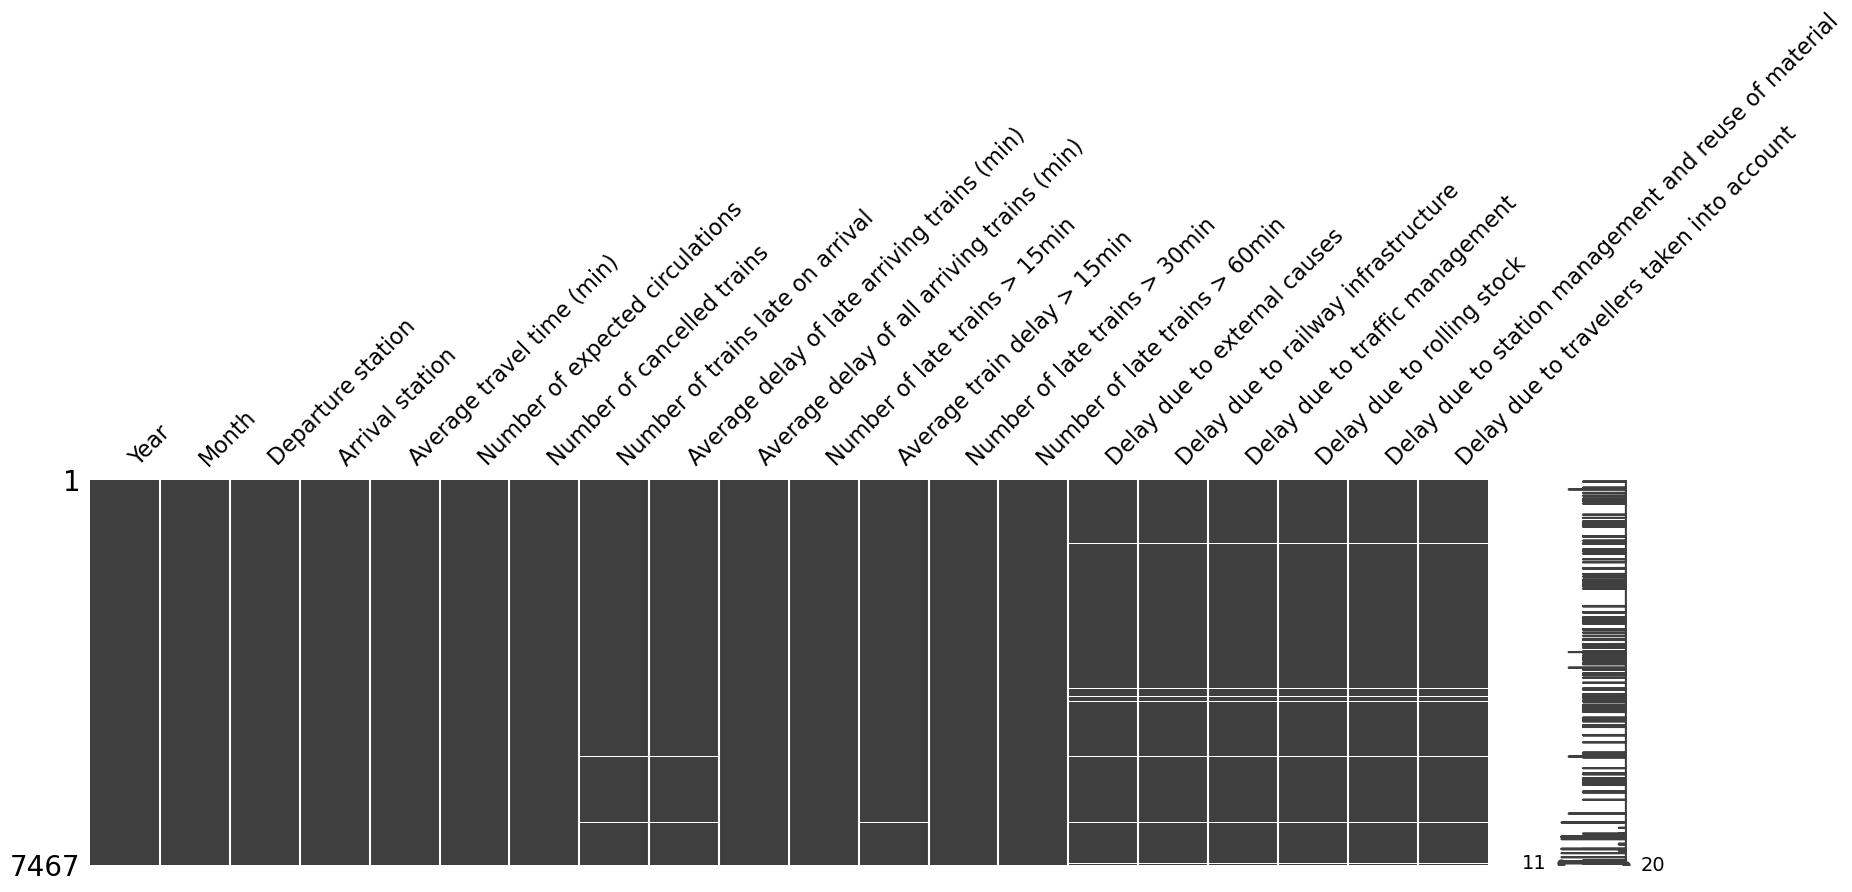

In [20]:
# Visualization of missing values
ms.matrix(df_clean, figsize= [20, 5])

In [21]:
# List of rown for drop
col_to_drop = dc.drop_missing_five(df_clean)

In [22]:
# Drop missing values below 5%
df_clean.dropna(subset = col_to_drop, inplace = True)

In [23]:
# Check if droping missing values was ok
assert any(col for col in df_clean.columns if df_clean[col].isna().sum() == 0), 'Found missing values in at least one column'
print('Missing values not found in any column')

Missing values not found in any column


<Axes: >

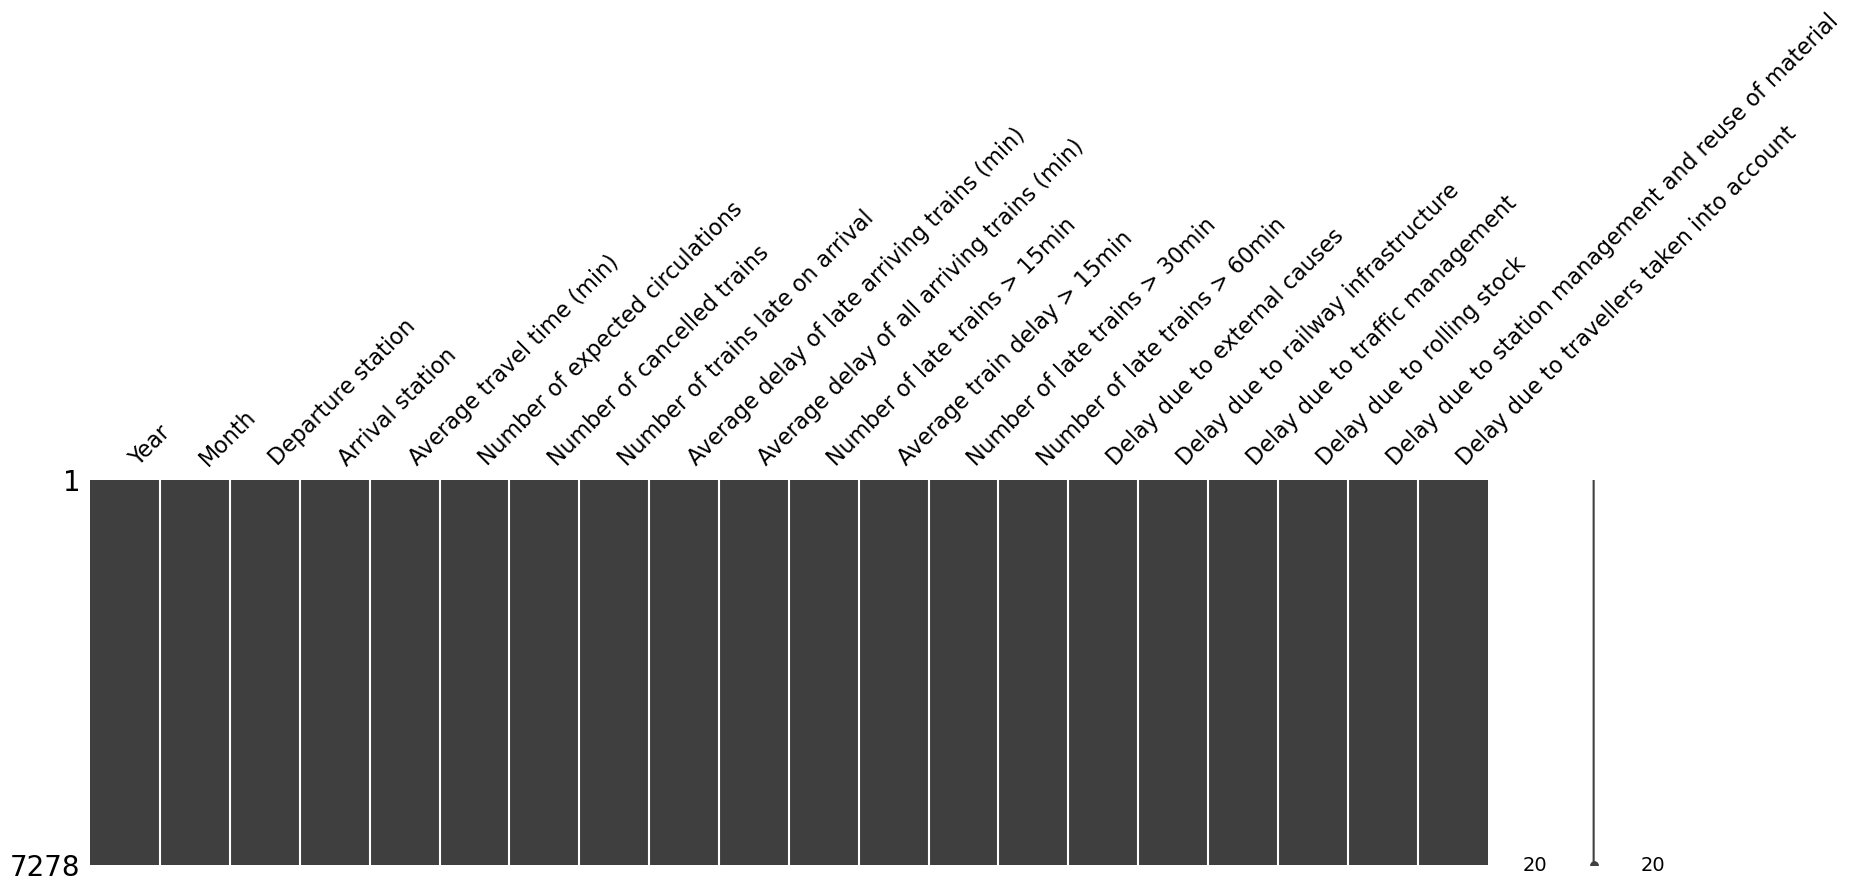

In [24]:
# Visualization of missing values
ms.matrix(df_clean, figsize= [20, 5])

#### Update Data Types

In [25]:
# Check column type and size in bytes
dc.columns_bsize(df_clean)

['Year --- 58224 --- int64',
 'Month --- 58224 --- float64',
 'Departure station --- 58224 --- object',
 'Arrival station --- 58224 --- object',
 'Average travel time (min) --- 58224 --- float64',
 'Number of expected circulations --- 58224 --- float64',
 'Number of cancelled trains --- 58224 --- float64',
 'Number of trains late on arrival --- 58224 --- float64',
 'Average delay of late arriving trains (min) --- 58224 --- float64',
 'Average delay of all arriving trains (min) --- 58224 --- float64',
 'Number of late trains > 15min --- 58224 --- float64',
 'Average train delay > 15min --- 58224 --- float64',
 'Number of late trains > 30min --- 58224 --- float64',
 'Number of late trains > 60min --- 58224 --- float64',
 'Delay due to external causes --- 58224 --- float64',
 'Delay due to railway infrastructure --- 58224 --- float64',
 'Delay due to traffic management --- 58224 --- float64',
 'Delay due to rolling stock --- 58224 --- float64',
 'Delay due to station management and reuse 

In [26]:
# Create list of columns that should be int type
to_int = ['Year', 'Month', 'Number of expected circulations', 'Number of cancelled trains',
           'Number of trains late on arrival', 'Number of late trains > 15min', 'Number of late trains > 30min',
           'Number of late trains > 60min']

In [27]:
# Change column type to int type
dc.change_to_int(df_clean, to_int)

In [28]:
assert all(df_clean[col].dtype == 'int16' for col in to_int),  'Failed to convert all columns.'

print('The columns were successfully converted to int16.')

The columns were successfully converted to int16.


In [29]:
# Check column type and size in bytes
dc.columns_bsize(df_clean)

['Year --- 14556 --- int16',
 'Month --- 14556 --- int16',
 'Departure station --- 58224 --- object',
 'Arrival station --- 58224 --- object',
 'Average travel time (min) --- 58224 --- float64',
 'Number of expected circulations --- 14556 --- int16',
 'Number of cancelled trains --- 14556 --- int16',
 'Number of trains late on arrival --- 14556 --- int16',
 'Average delay of late arriving trains (min) --- 58224 --- float64',
 'Average delay of all arriving trains (min) --- 58224 --- float64',
 'Number of late trains > 15min --- 14556 --- int16',
 'Average train delay > 15min --- 58224 --- float64',
 'Number of late trains > 30min --- 14556 --- int16',
 'Number of late trains > 60min --- 14556 --- int16',
 'Delay due to external causes --- 58224 --- float64',
 'Delay due to railway infrastructure --- 58224 --- float64',
 'Delay due to traffic management --- 58224 --- float64',
 'Delay due to rolling stock --- 58224 --- float64',
 'Delay due to station management and reuse of material --

In [30]:
df_clean.describe()

,Year,Month,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
count,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000
mean,2017.327288,6.222176,166.718681,272.930475,8.093844,37.071723,32.981337,5.593329,25.422506,29.653779,11.452047,4.162819,26.771449,25.457351,19.149740,18.136108,6.766044,3.646776
std,1.572769,3.475107,80.460889,157.060081,21.561035,29.428234,13.625678,3.806875,20.401824,18.727495,9.947041,4.508402,16.104727,15.740855,14.617488,12.986280,7.672600,5.595285
min,2015.000000,1.000000,45.956731,4.000000,0.000000,1.000000,8.118182,0.007026,0.000000,0.051345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,100.501149,171.000000,0.000000,17.000000,24.167117,2.965188,11.000000,9.322218,5.000000,1.000000,15.789474,15.057446,8.823529,9.523810,0.000000,0.000000
50%,2017.000000,6.000000,162.000456,232.000000,1.000000,29.000000,31.089749,4.786579,20.000000,32.387881,9.000000,3.000000,25.000000,23.529412,17.214440,16.227766,5.128205,1.886792
75%,2019.000000,9.000000,208.792932,372.000000,6.000000,49.000000,39.413286,7.391633,34.000000,41.569687,15.000000,6.000000,35.714286,33.333333,26.923077,25.000000,10.000000,5.555556
max,2020.000000,12.000000,492.545455,960.000000,279.000000,235.000000,258.000000,83.388889,192.000000,258.000000,91.000000,37.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### Outliners

In [31]:
# List of lower outliners with treshold and number of values
dc.lower_treshholders(df_clean)

Column: Year
Lower treshold 2011.5
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Month
Lower treshold -6.0
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Average travel time (min)
Lower treshold -61.936525261
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of expected circulations
Lower treshold -130.5
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of cancelled trains
Lower treshold -9.0
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of trains late on arrival
Lower treshold -31.0
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Average delay of late arriving trains (min)
Lower treshold 1.2978637868374925
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Average delay of all arriving trains (min)
Lower treshold -3.674479609293749
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of late trains > 15min
Lower treshold -23.5
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Average train delay > 15min
Lower treshold -39

In [32]:
# List of upper outliners with treshold and number of values
dc.upper_treshholders(df_clean)

Column: Year
Upper treshold 2023.5
Ilosc wartosci powyzej górnego outlinera: 0

Column: Month
Upper treshold 18.0
Ilosc wartosci powyzej górnego outlinera: 0

Column: Average travel time (min)
Upper treshold 371.23060604700004
Ilosc wartosci powyzej górnego outlinera: 111

Column: Number of expected circulations
Upper treshold 673.5
Ilosc wartosci powyzej górnego outlinera: 77

Column: Number of cancelled trains
Upper treshold 15.0
Ilosc wartosci powyzej górnego outlinera: 850

Column: Number of trains late on arrival
Upper treshold 97.0
Ilosc wartosci powyzej górnego outlinera: 355

Column: Average delay of late arriving trains (min)
Upper treshold 62.282539334337514
Ilosc wartosci powyzej górnego outlinera: 238

Column: Average delay of all arriving trains (min)
Upper treshold 14.03130072355625
Ilosc wartosci powyzej górnego outlinera: 228

Column: Number of late trains > 15min
Upper treshold 68.5
Ilosc wartosci powyzej górnego outlinera: 308

Column: Average train delay > 15min
Uppe

##### Check outliners with remove option

In [33]:
# Remove outliners for new dataset copy
df_clean_after_remove = dc.remove_outliners(df_clean)

<function matplotlib.pyplot.show(close=None, block=None)>

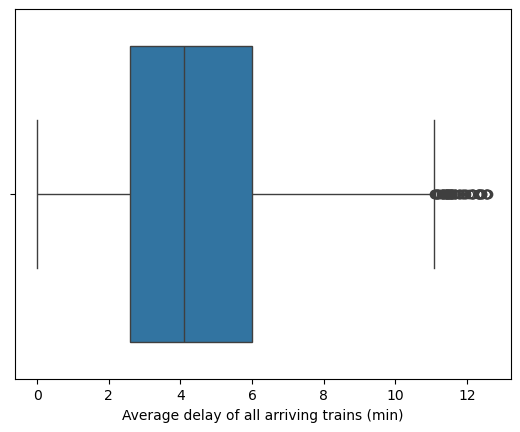

In [34]:
# Chart to check outliners after remove
sns.boxplot(data= df_clean_after_remove, x = 'Average delay of all arriving trains (min)')
plt.show

In [35]:
# Dataset size
len(df_clean_after_remove)

4267

##### Check outliners after replace with median

In [36]:
# Remove outliners for new dataset copy
df_check_replace = df_clean.copy()

In [37]:
# Remove outliners with median value for each column
condition = df_clean['Average delay of all arriving trains (min)'] > 35.33761954314001
median_value = df_clean['Average delay of all arriving trains (min)'].median()
df_check_replace.loc[condition, 'Average delay of all arriving trains (min)'] = median_value

<function matplotlib.pyplot.show(close=None, block=None)>

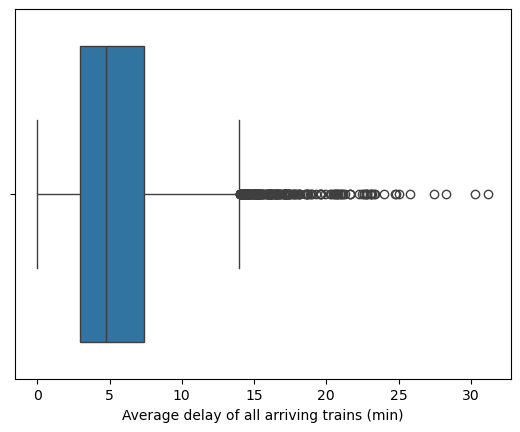

In [38]:
# Chart to check outliners after remove
sns.boxplot(data= df_check_replace, x = 'Average delay of all arriving trains (min)')
plt.show

In [39]:
# Dataset size
len(df_check_replace)

7278

##### Check outliners with iteration removing

In [40]:
# Remove outliners for new dataset copy
df_remove_iteration = df_clean.copy()

In [41]:
# Loop to remove outliners until there is no outliners
while True:
    initial_len = len(df_remove_iteration)
    df_remove_iteration = dc.remove_outliners(df_remove_iteration)
    if len(df_remove_iteration) == initial_len:
        break

<function matplotlib.pyplot.show(close=None, block=None)>

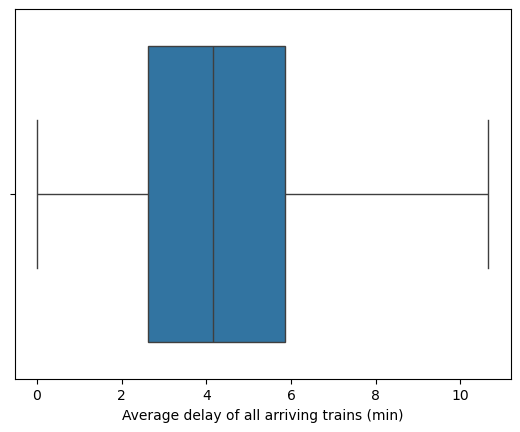

In [42]:
# Chart to check outliners after remove
sns.boxplot(data= df_remove_iteration, x = 'Average delay of all arriving trains (min)')
plt.show

In [43]:
# Dataset size
len(df_remove_iteration)

2445

In [44]:
df_clean.reset_index(drop= True)

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,41,22.924797,5.233333,21,32.965873,7,2,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,47,27.085106,6.123967,35,32.057143,14,2,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,91,18.440659,4.430194,30,42.367241,13,4,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,15,20.618889,3.812135,8,27.620833,2,0,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,73,19.608447,4.176208,28,37.658333,12,3,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,2020,5,LYON PART DIEU,LILLE,193.436620,87,16,4,21.483333,3.508451,5,36.320833,3,0,0.000000,50.000000,0.000000,25.000000,25.000000,0.000000
7274,2020,5,AIX EN PROVENCE TGV,PARIS LYON,188.161074,166,17,6,28.358333,0.310738,6,28.358333,3,0,50.000000,16.666667,16.666667,0.000000,16.666667,0.000000
7275,2020,5,PARIS LYON,AVIGNON TGV,162.702381,191,23,11,37.110606,2.020933,8,46.264583,4,1,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7276,2020,5,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227,28,10,49.050000,3.657203,10,49.050000,6,1,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000


#### Save dataset after cleaning 

In [45]:
# Save dataset to CSV file
df_clean.to_csv('CSV\Clean_DataSet_Trains.csv')

### Feature Enginering

In [46]:
df_clean.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,41,22.924797,5.233333,21,32.965873,7,2,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,47,27.085106,6.123967,35,32.057143,14,2,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,91,18.440659,4.430194,30,42.367241,13,4,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,15,20.618889,3.812135,8,27.620833,2,0,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,73,19.608447,4.176208,28,37.658333,12,3,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


#### Add Line Columns

In [47]:
df_clean['Train Line'] = df_clean['Departure station'] + "-" + df_clean['Arrival station']

In [48]:
#Check of new column "Train Line" was added
assert any(df_clean.columns.str.contains('Train Line')), 'Failed to find "Train Line" column. Not added'

print('The column was successfully added to dataset.')

The column was successfully added to dataset.


In [49]:
df_clean.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Train Line
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,41,22.924797,5.233333,21,32.965873,7,2,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000,ANGOULEME-PARIS MONTPARNASSE
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,47,27.085106,6.123967,35,32.057143,14,2,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444,PARIS MONTPARNASSE-LA ROCHELLE VILLE
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,91,18.440659,4.430194,30,42.367241,13,4,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941,LE MANS-PARIS MONTPARNASSE
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,15,20.618889,3.812135,8,27.620833,2,0,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308,ST MALO-PARIS MONTPARNASSE
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,73,19.608447,4.176208,28,37.658333,12,3,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385,PARIS MONTPARNASSE-ST PIERRE DES CORPS


In [50]:
# Check how many train lines are in dataset
df_clean['Train Line'].value_counts()

Train Line
POITIERS-PARIS MONTPARNASSE             66
AVIGNON TGV-PARIS LYON                  66
LE MANS-PARIS MONTPARNASSE              66
NANTES-PARIS MONTPARNASSE               66
PARIS MONTPARNASSE-TOULOUSE MATABIAU    66
                                        ..
PARIS VAUGIRARD-NANTES                  11
RENNES-PARIS VAUGIRARD                  10
PARIS VAUGIRARD-BORDEAUX ST JEAN        10
PARIS VAUGIRARD-RENNES                  10
TOURCOING-MARSEILLE ST CHARLES           8
Name: count, Length: 130, dtype: int64

#### Add Due Sum Column

In [51]:
# New column with sum of delays
df_clean['Delays'] = df_clean['Delay due to external causes']\
+ df_clean['Delay due to railway infrastructure']\
+ df_clean['Delay due to rolling stock']\
+ df_clean['Delay due to station management and reuse of material']\
+ df_clean['Delay due to traffic management']\
+ df_clean['Delay due to travellers taken into account']

In [52]:
#Check of new column "Delays" was added
assert any(df_clean.columns.str.contains('Delays')), 'Failed to find "Delays" column. Not added'

print('The column was successfully added to dataset.')

The column was successfully added to dataset.


In [53]:
df_clean.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Train Line,Delays
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,41,22.924797,5.233333,21,32.965873,7,2,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000,ANGOULEME-PARIS MONTPARNASSE,100.0
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,47,27.085106,6.123967,35,32.057143,14,2,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444,PARIS MONTPARNASSE-LA ROCHELLE VILLE,100.0
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,91,18.440659,4.430194,30,42.367241,13,4,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941,LE MANS-PARIS MONTPARNASSE,100.0
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,15,20.618889,3.812135,8,27.620833,2,0,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308,ST MALO-PARIS MONTPARNASSE,100.0
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,73,19.608447,4.176208,28,37.658333,12,3,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385,PARIS MONTPARNASSE-ST PIERRE DES CORPS,100.0


#### Set categories for new column

In [54]:
# Label for categories & bins
categories_labels = ['Small', 'Medium', 'High', 'Very High']
small = df_clean['Average delay of late arriving trains (min)'].quantile(0.25)
medium = df_clean['Average delay of late arriving trains (min)'].mean()
high = df_clean['Average delay of late arriving trains (min)'].quantile(0.75)
categories_bins = [0, small, medium, high, np.inf]

In [55]:
df_clean['Delay Label'] = pd.cut(df_clean['Average delay of late arriving trains (min)'], labels= categories_labels, bins= categories_bins)

In [56]:
#Check of new column "Delay Label" was added
assert any(df_clean.columns.str.contains('Delay Label')), 'Failed to find "Delay Label" column. Not added'

print('The column was successfully added to dataset.')

The column was successfully added to dataset.


In [57]:
# Change Delay Label to category type with order
df_clean['Delay Label'] = pd.Categorical(df_clean['Delay Label'], categories=categories_labels, ordered=True)

In [58]:
df_clean['Delay Label'].dtype

CategoricalDtype(categories=['Small', 'Medium', 'High', 'Very High'], ordered=True, categories_dtype=object)

#### Add Circulation Column

In [59]:
df_clean['Circulations'] = df_clean['Number of expected circulations'] - df_clean['Number of cancelled trains']

In [60]:
#Check of new column "Circulations" was added
assert any(df_clean.columns.str.contains('Circulations')), 'Failed to find "Circulations" column. Not added'

print('The column was successfully added to dataset.')

The column was successfully added to dataset.


#### Add column with % delay over circulations

In [61]:
df_clean['% Delay over Circulations'] = (df_clean['Number of trains late on arrival'] / df_clean['Circulations']) * 100

In [62]:
#Check of new column "% Delay over Circulations" was added
assert any(df_clean.columns.str.contains('% Delay over Circulations')), 'Failed to find "% Delay over Circulations" column. Not added'

print('The column was successfully added to dataset.')

The column was successfully added to dataset.


#### Top 10 train lines for weight mean by Ave. all delay and Ave. late delay

##### Mean number of circulations

In [63]:
mean_circu = df_clean['Circulations'].mean()
print(f'Mean number of circulations: {mean_circu}')

Mean number of circulations: 264.8366309425666


##### All arriving delays

In [64]:
weight_all = df_clean.groupby('Train Line').apply(dc.weight_average, 'Average delay of all arriving trains (min)')

top_10_all = weight_all.sort_values(ascending= False).head(10)

top_10_all_lines = top_10_all.index.tolist()

top_10_all_lines

['PARIS LYON-BARCELONA',
 'MADRID-MARSEILLE ST CHARLES',
 'BARCELONA-PARIS LYON',
 'LYON PART DIEU-RENNES',
 'MARSEILLE ST CHARLES-LILLE',
 'LYON PART DIEU-LILLE',
 'PARIS LYON-NICE VILLE',
 'LILLE-MARSEILLE ST CHARLES',
 'MARNE LA VALLEE-MARSEILLE ST CHARLES',
 'PARIS LYON-PERPIGNAN']

In [65]:
df_all = df_clean[df_clean['Train Line'].isin(top_10_all_lines)]

In [66]:
df_all['Train Line'].value_counts()

Train Line
LYON PART DIEU-LILLE                    65
LYON PART DIEU-RENNES                   65
MARSEILLE ST CHARLES-LILLE              65
LILLE-MARSEILLE ST CHARLES              64
PARIS LYON-NICE VILLE                   64
PARIS LYON-PERPIGNAN                    63
MARNE LA VALLEE-MARSEILLE ST CHARLES    29
PARIS LYON-BARCELONA                    22
MADRID-MARSEILLE ST CHARLES             21
BARCELONA-PARIS LYON                    19
Name: count, dtype: int64

##### Late arriving delays

In [67]:
weight_late = df_clean.groupby('Train Line').apply(dc.weight_average, 'Average delay of late arriving trains (min)')

top_10_late = weight_late.sort_values(ascending= False).head(10)

top_10_late_lines = top_10_late.index.to_list()

top_10_late_lines

['BARCELONA-PARIS LYON',
 'PARIS LYON-BARCELONA',
 'MADRID-MARSEILLE ST CHARLES',
 'MARSEILLE ST CHARLES-MADRID',
 'PARIS LYON-PERPIGNAN',
 'PERPIGNAN-PARIS LYON',
 'NANTES-PARIS VAUGIRARD',
 'PARIS MONTPARNASSE-BREST',
 'PARIS MONTPARNASSE-TOULOUSE MATABIAU',
 'NANTES-STRASBOURG']

In [68]:
df_late = df_clean[df_clean['Train Line'].isin(top_10_late_lines)]

In [69]:
df_late['Train Line'].value_counts()

Train Line
PARIS MONTPARNASSE-TOULOUSE MATABIAU    66
PERPIGNAN-PARIS LYON                    65
PARIS MONTPARNASSE-BREST                64
PARIS LYON-PERPIGNAN                    63
NANTES-STRASBOURG                       61
PARIS LYON-BARCELONA                    22
MADRID-MARSEILLE ST CHARLES             21
BARCELONA-PARIS LYON                    19
MARSEILLE ST CHARLES-MADRID             17
NANTES-PARIS VAUGIRARD                  12
Name: count, dtype: int64

#### Convert delay type to one column

In [70]:
df_clean.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       'Number of late trains > 15min', 'Average train delay > 15min',
       'Number of late trains > 30min', 'Number of late trains > 60min',
       'Delay due to external causes', 'Delay due to railway infrastructure',
       'Delay due to traffic management', 'Delay due to rolling stock',
       'Delay due to station management and reuse of material',
       'Delay due to travellers taken into account', 'Train Line', 'Delays',
       'Delay Label', 'Circulations', '% Delay over Circulations'],
      dtype='object')

In [71]:
col_save = df_clean.columns[~df_clean.columns.str.contains('due to')]

In [72]:
# Convert all columns delay due... to one columns with values
df_del_cat = df_clean.melt(id_vars = col_save, var_name = 'Delay Type', value_name = '% of delay')

In [73]:
df_del_cat.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Train Line,Delays,Delay Label,Circulations,% Delay over Circulations,Delay Type,% of delay
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,41,22.924797,5.233333,21,32.965873,7,2,ANGOULEME-PARIS MONTPARNASSE,100.0,Small,247,16.599190,Delay due to external causes,25.000000
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,47,27.085106,6.123967,35,32.057143,14,2,PARIS MONTPARNASSE-LA ROCHELLE VILLE,100.0,Medium,242,19.421488,Delay due to external causes,20.000000
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,91,18.440659,4.430194,30,42.367241,13,4,LE MANS-PARIS MONTPARNASSE,100.0,Small,430,21.162791,Delay due to external causes,16.176471
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,15,20.618889,3.812135,8,27.620833,2,0,ST MALO-PARIS MONTPARNASSE,100.0,Small,114,13.157895,Delay due to external causes,15.384615
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,73,19.608447,4.176208,28,37.658333,12,3,PARIS MONTPARNASSE-ST PIERRE DES CORPS,100.0,Small,400,18.250000,Delay due to external causes,18.461538


In [74]:
# Chamge type to categorical
df_del_cat['Delay Type'] = df_del_cat['Delay Type'].astype('category').cat.set_categories(new_categories=df_del_cat['Delay Type'].unique().tolist())

In [75]:
df_del_cat['Delay Type'].cat.categories

Index(['Delay due to external causes', 'Delay due to railway infrastructure',
       'Delay due to traffic management', 'Delay due to rolling stock',
       'Delay due to station management and reuse of material',
       'Delay due to travellers taken into account'],
      dtype='object')

In [76]:
df_clean.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       'Number of late trains > 15min', 'Average train delay > 15min',
       'Number of late trains > 30min', 'Number of late trains > 60min',
       'Delay due to external causes', 'Delay due to railway infrastructure',
       'Delay due to traffic management', 'Delay due to rolling stock',
       'Delay due to station management and reuse of material',
       'Delay due to travellers taken into account', 'Train Line', 'Delays',
       'Delay Label', 'Circulations', '% Delay over Circulations'],
      dtype='object')

In [77]:
df_clean.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Train Line,Delays,Delay Label,Circulations,% Delay over Circulations
0,2019,7,ANGOULEME,PARIS MONTPARNASSE,131.914980,247,0,41,22.924797,5.233333,21,32.965873,7,2,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000,ANGOULEME-PARIS MONTPARNASSE,100.0,Small,247,16.599190
1,2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242,0,47,27.085106,6.123967,35,32.057143,14,2,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444,PARIS MONTPARNASSE-LA ROCHELLE VILLE,100.0,Medium,242,19.421488
2,2019,7,LE MANS,PARIS MONTPARNASSE,62.395349,435,5,91,18.440659,4.430194,30,42.367241,13,4,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941,LE MANS-PARIS MONTPARNASSE,100.0,Small,430,21.162791
3,2019,7,ST MALO,PARIS MONTPARNASSE,172.421053,114,0,15,20.618889,3.812135,8,27.620833,2,0,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308,ST MALO-PARIS MONTPARNASSE,100.0,Small,114,13.157895
4,2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404,4,73,19.608447,4.176208,28,37.658333,12,3,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385,PARIS MONTPARNASSE-ST PIERRE DES CORPS,100.0,Small,400,18.250000


### Anylysis

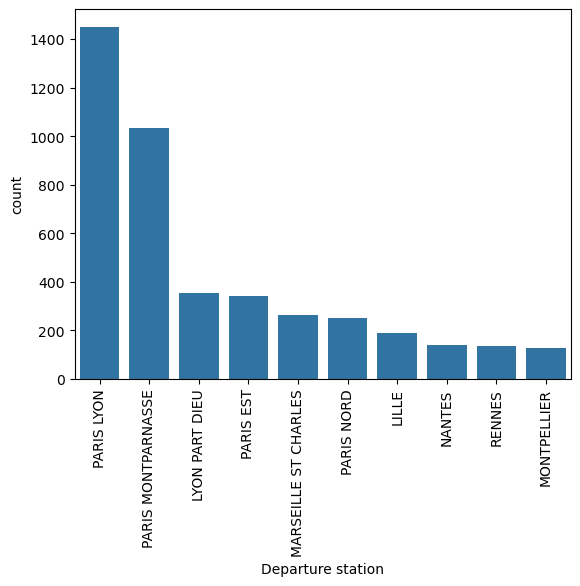

In [78]:
# Chart with top 10 Departure stations
sns.countplot(data = df_clean, x = "Departure station", order = df_clean['Departure station'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

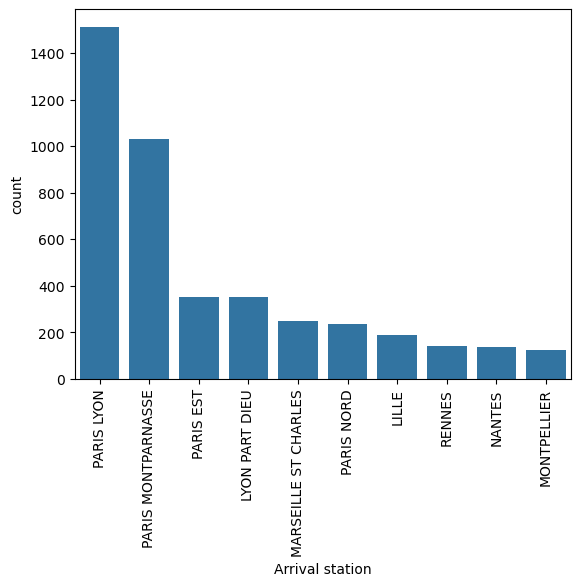

In [79]:
# Chart with top 10 Arrival stations
sns.countplot(data = df_clean, x = "Arrival station", order = df_clean['Arrival station'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

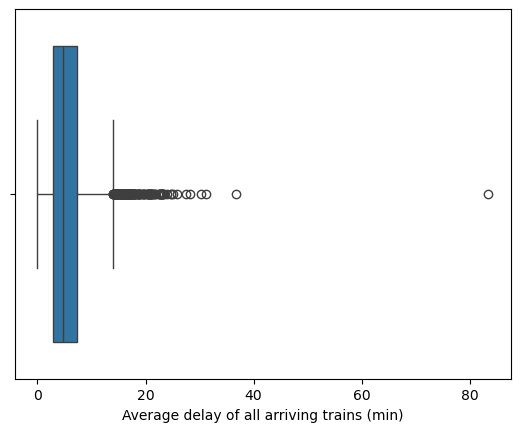

In [80]:
# Chart showing distributions for all arrving trains delays
sns.boxplot(data= df_clean, x = 'Average delay of all arriving trains (min)')
plt.show()

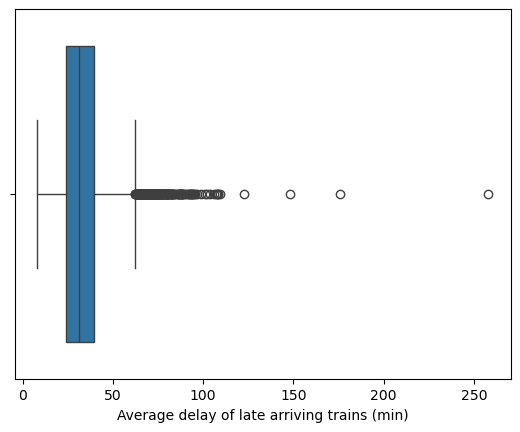

In [81]:
# Chart showing distributions for all arrving trains delays
sns.boxplot(data= df_clean, x = 'Average delay of late arriving trains (min)')
plt.show()

In [82]:
# Top 10 Departure stations
top_10_dep_stations = df_clean['Departure station'].value_counts().head(10).index
top_10_dep_stations

Index(['PARIS LYON', 'PARIS MONTPARNASSE', 'LYON PART DIEU', 'PARIS EST',
       'MARSEILLE ST CHARLES', 'PARIS NORD', 'LILLE', 'NANTES', 'RENNES',
       'MONTPELLIER'],
      dtype='object', name='Departure station')

In [83]:
# Top 10 stations participation in whole station list
top_10 = round((len(df_clean[df_clean['Departure station'].isin(top_10_dep_stations)]) / len(df_clean) ) * 100, 2)
print(f'Top 10 Departure Station is {top_10} % of whole dataset.')

Top 10 Departure Station is 58.94 % of whole dataset.


#### Correlations

In [84]:
# Select only numeric values for correlation
corr_col = df_clean.select_dtypes(include=['number'])

In [85]:
# Corr table
corr_df = corr_col.corr()

##### Heatmap of correlations

<Axes: >

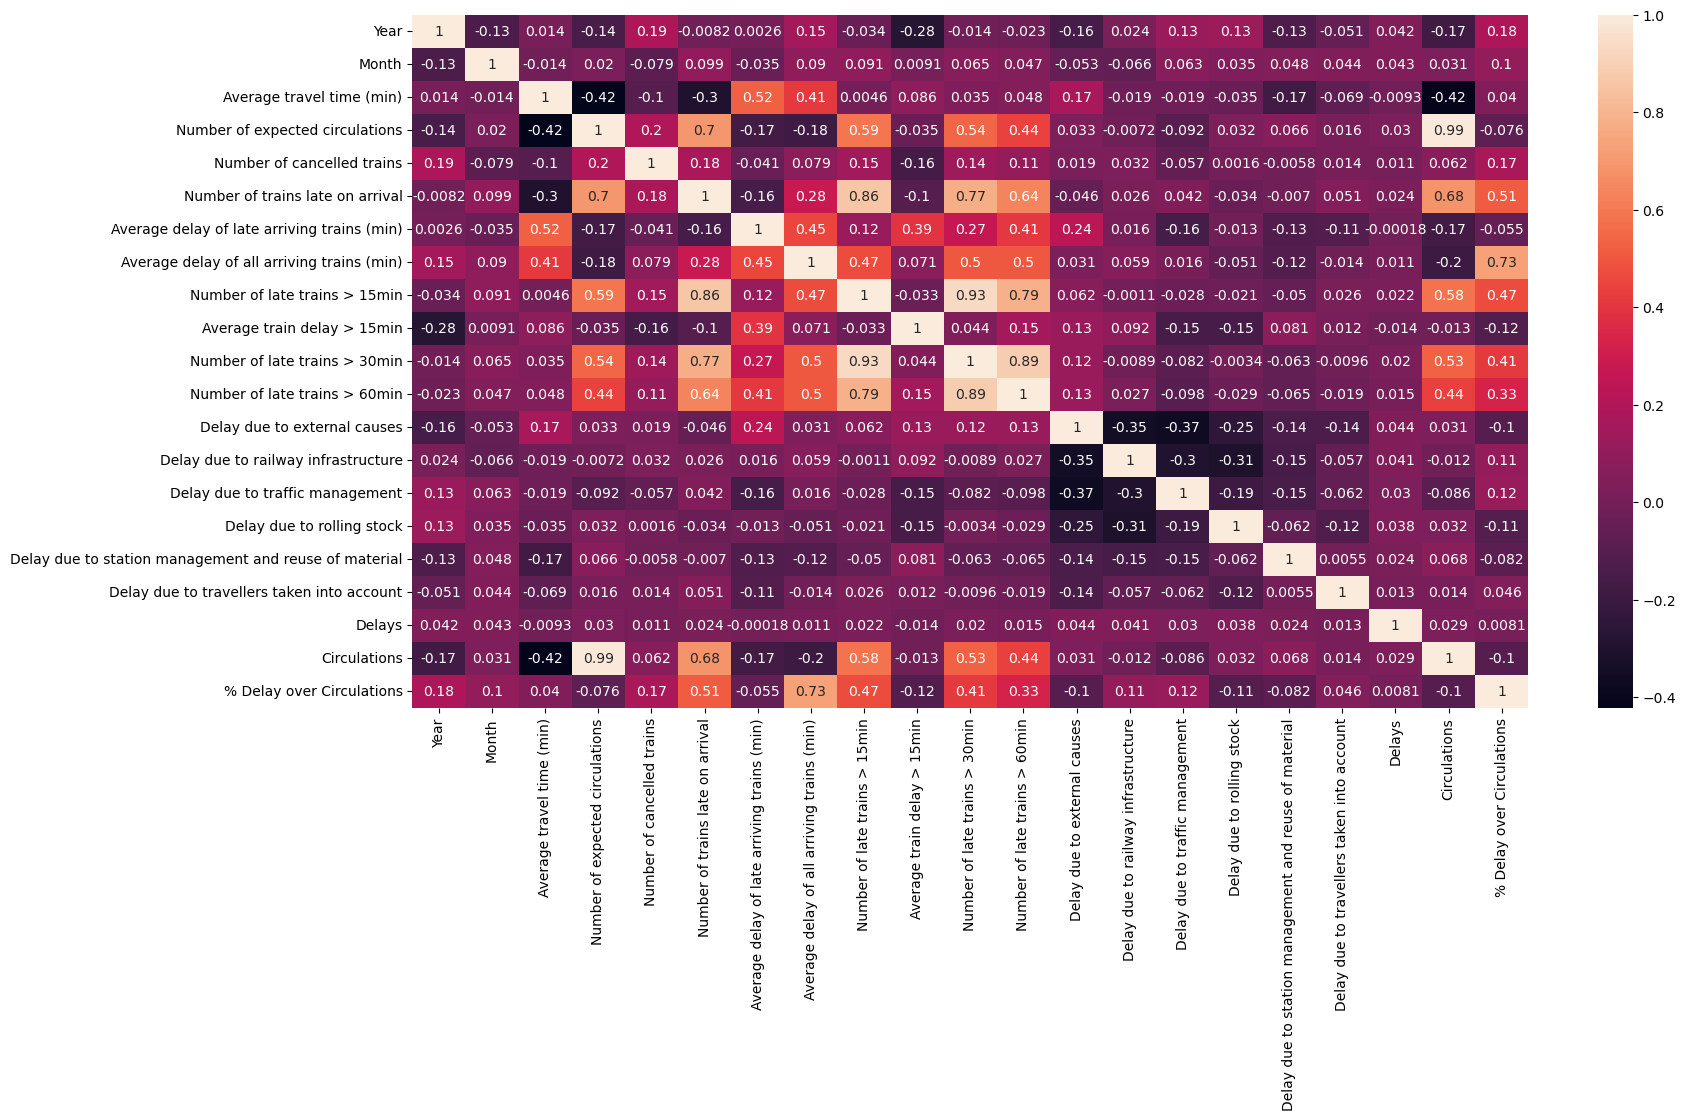

In [86]:
# Heatmap
fig, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(corr_df, annot= True)

#### Analysis Late

##### Average delay of late train arrivals at different routes.

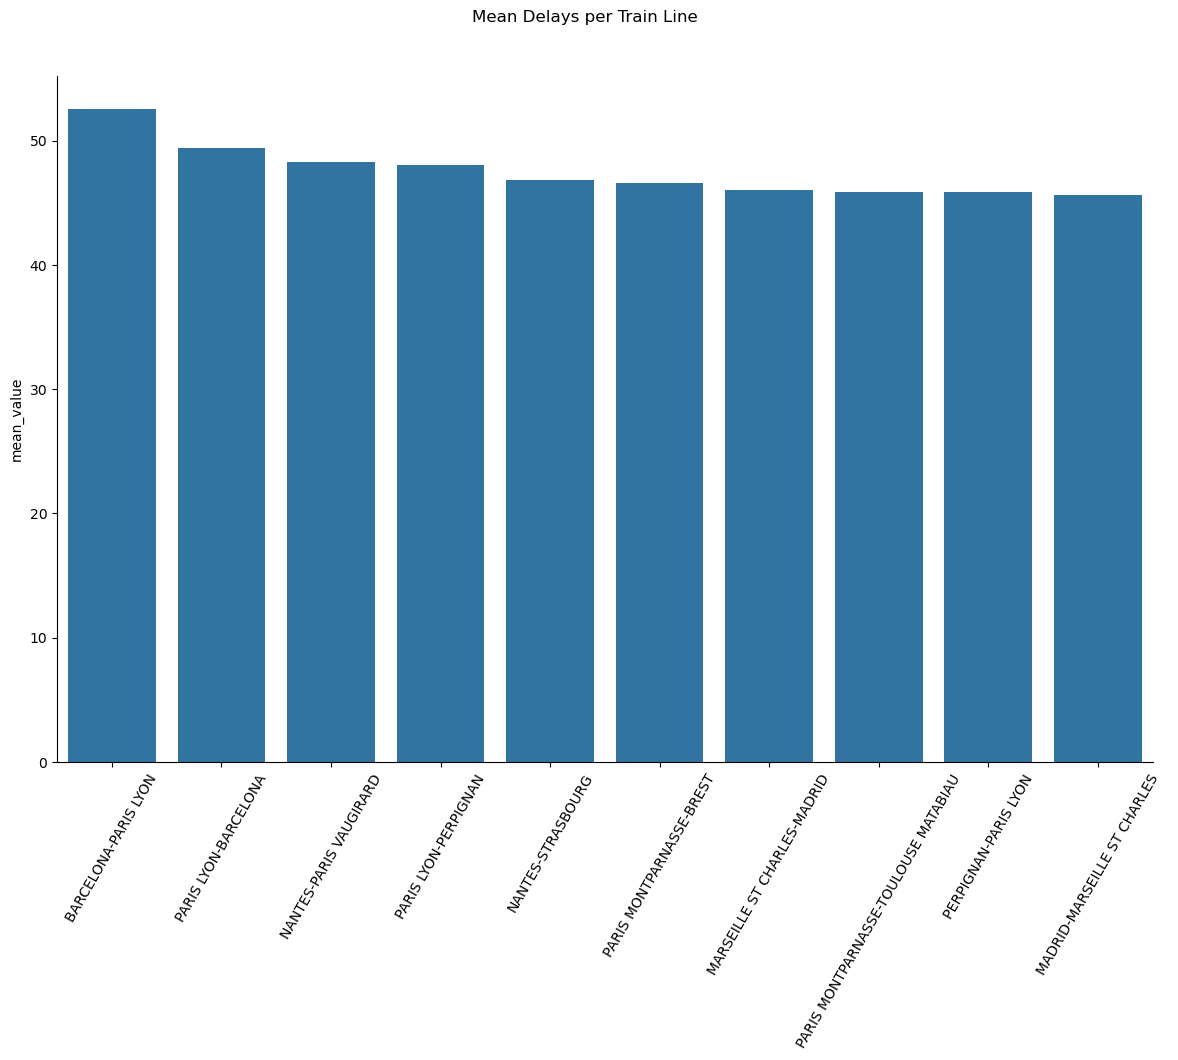

In [87]:
mean_del = df_late.groupby('Train Line').agg(mean_value =('Average delay of late arriving trains (min)','mean')).sort_values(by = 'mean_value', ascending= False)
mdtr = sns.catplot(data= mean_del, x = mean_del.index, y = 'mean_value', kind = 'bar', height= 8.27, aspect= 11.7/8.27)
mdtr.figure.subplots_adjust(top= 0.9)
mdtr.figure.suptitle('Mean Delays per Train Line')
mdtr.set_xlabels('')
plt.xticks(rotation = 60)
pass

##### Average delay of late train arrivals at different times - Year

In [88]:
mean_del_time = df_late.groupby(['Year', 'Month']).agg(mean_value =('Average delay of late arriving trains (min)','mean')).sort_values(by = 'mean_value', ascending= False).reset_index()


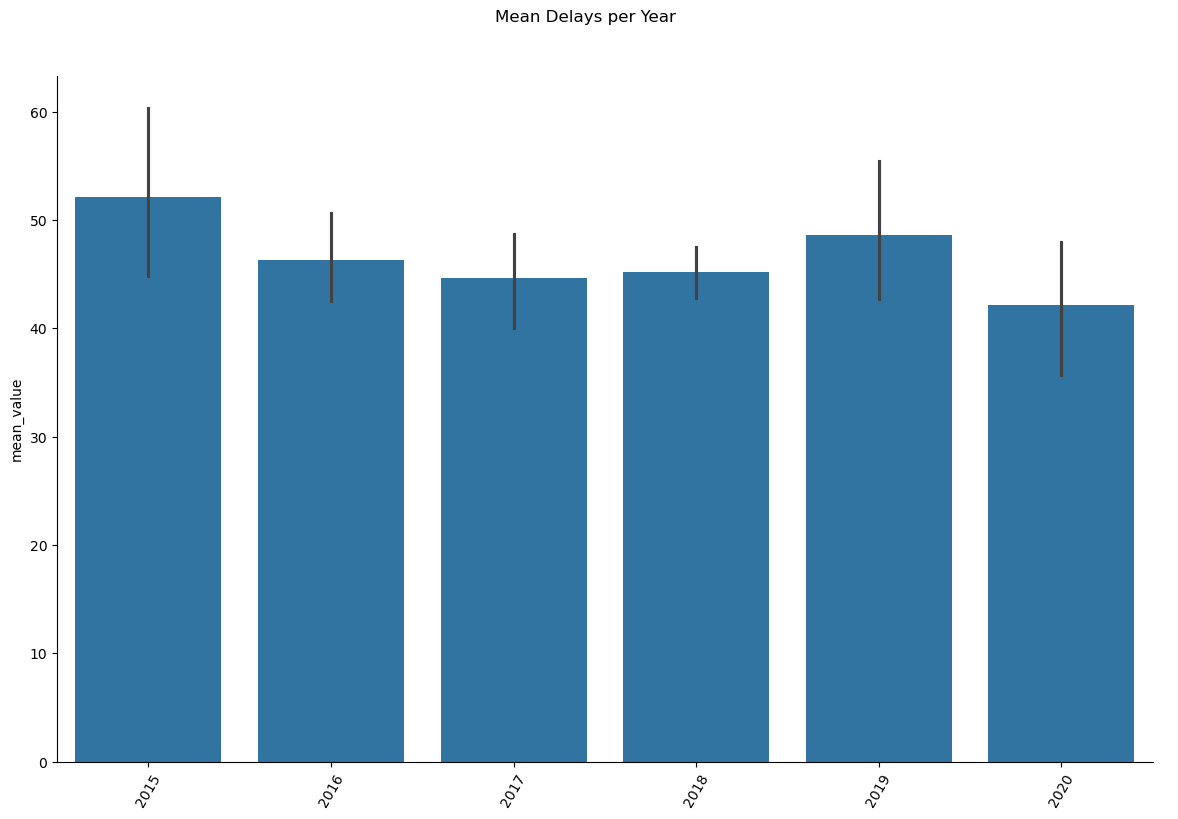

In [89]:
mdtr = sns.catplot(data= mean_del_time, x = 'Year', y = 'mean_value', kind = 'bar', height= 8.27, aspect= 11.7/8.27)
mdtr.figure.subplots_adjust(top= 0.9)
mdtr.figure.suptitle('Mean Delays per Year')
mdtr.set_xlabels('')
plt.xticks(rotation = 60)
pass

##### Average delay of late train arrivals at different times - Month

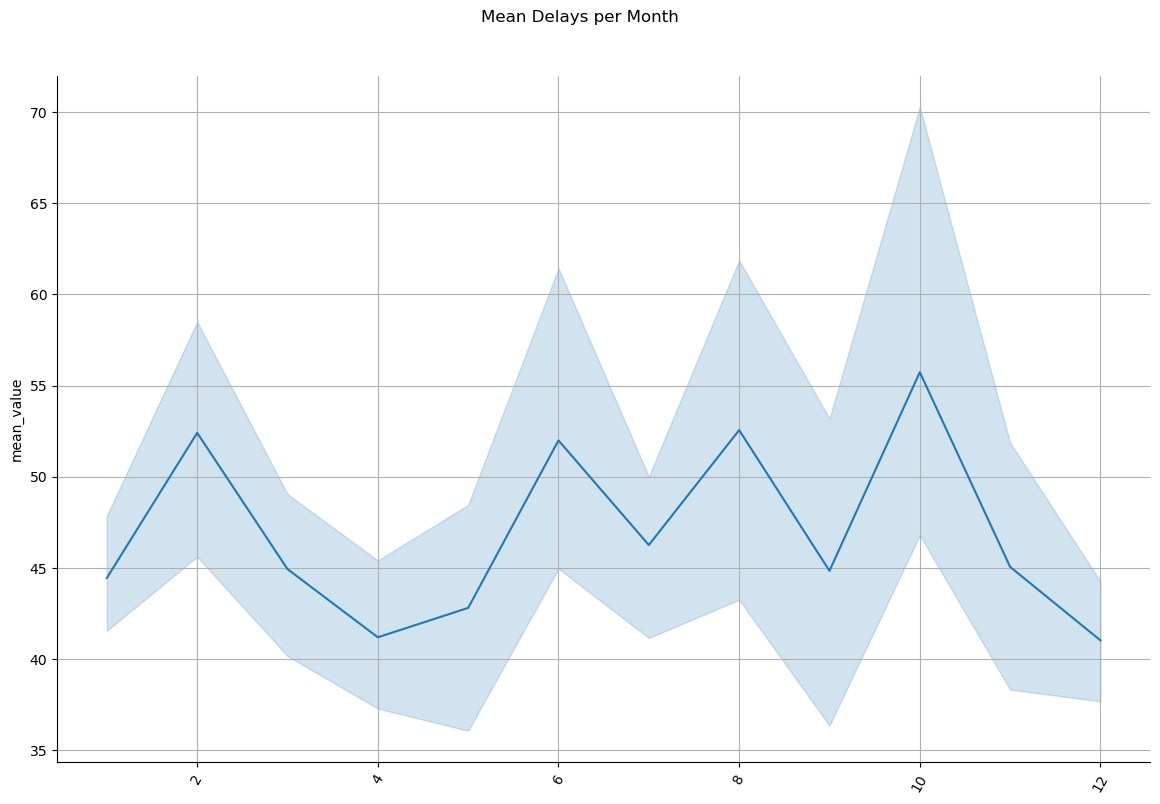

In [90]:
mdtr = sns.relplot(data= mean_del_time, x = 'Month', y = 'mean_value', kind = 'line', height= 8.27, aspect= 11.7/8.27)
mdtr.figure.subplots_adjust(top= 0.9)
mdtr.figure.suptitle('Mean Delays per Month')
mdtr.set_xlabels('')
plt.xticks(rotation = 60)
plt.grid()
pass

##### Average delay of late train arrivals at different times - Months per Year

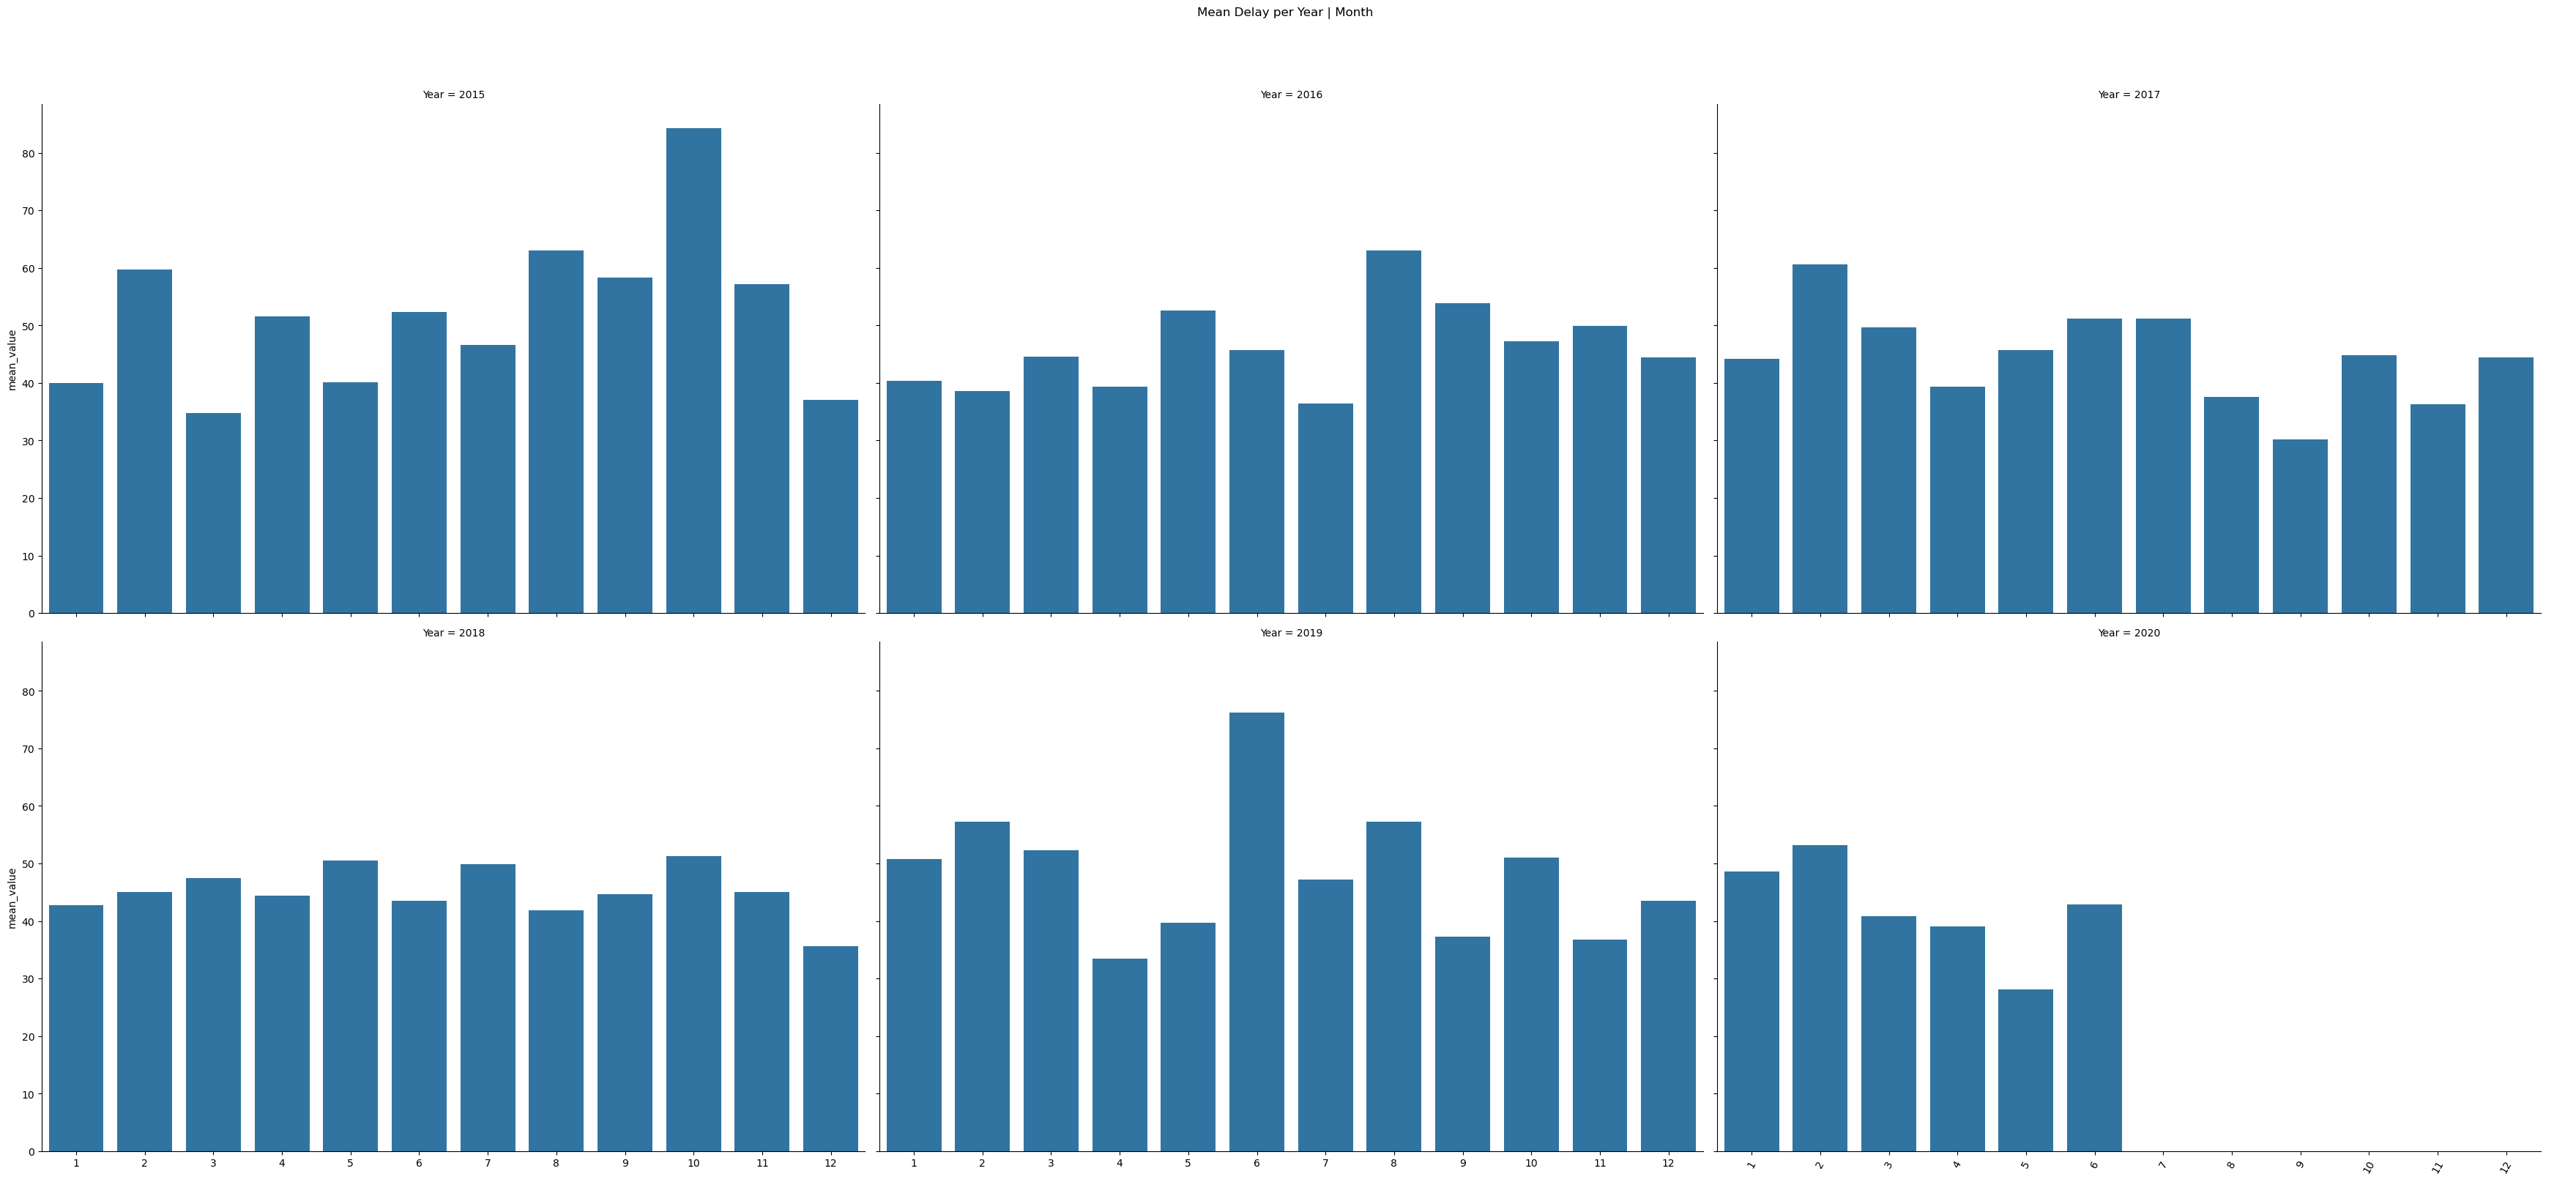

In [91]:
mdtr = sns.catplot(data= mean_del_time, x = 'Month', y = 'mean_value', kind = 'bar', height= 8.27, aspect= 11.7/8.27, col = 'Year', col_wrap= 3)
mdtr.figure.subplots_adjust(top= 0.9)
mdtr.figure.suptitle('Mean Delay per Year | Month')
mdtr.set_xlabels('')
plt.xticks(rotation = 60)
pass

##### Percentage late arrival vs cirulations

In [92]:
mean_circ_perc = df_late.groupby('Train Line').agg(mean_value =('% Delay over Circulations','mean')).sort_values(by = 'mean_value', ascending= False).reset_index()

In [93]:
mean_circ_perc

,Train Line,mean_value
0,MADRID-MARSEILLE ST CHARLES,23.004820
1,PARIS LYON-BARCELONA,20.098131
2,BARCELONA-PARIS LYON,18.270809
3,PERPIGNAN-PARIS LYON,17.206754
4,PARIS LYON-PERPIGNAN,17.003682
5,PARIS MONTPARNASSE-TOULOUSE MATABIAU,16.018033
6,NANTES-PARIS VAUGIRARD,15.114995
7,MARSEILLE ST CHARLES-MADRID,15.042894
8,NANTES-STRASBOURG,12.548304
9,PARIS MONTPARNASSE-BREST,8.602592


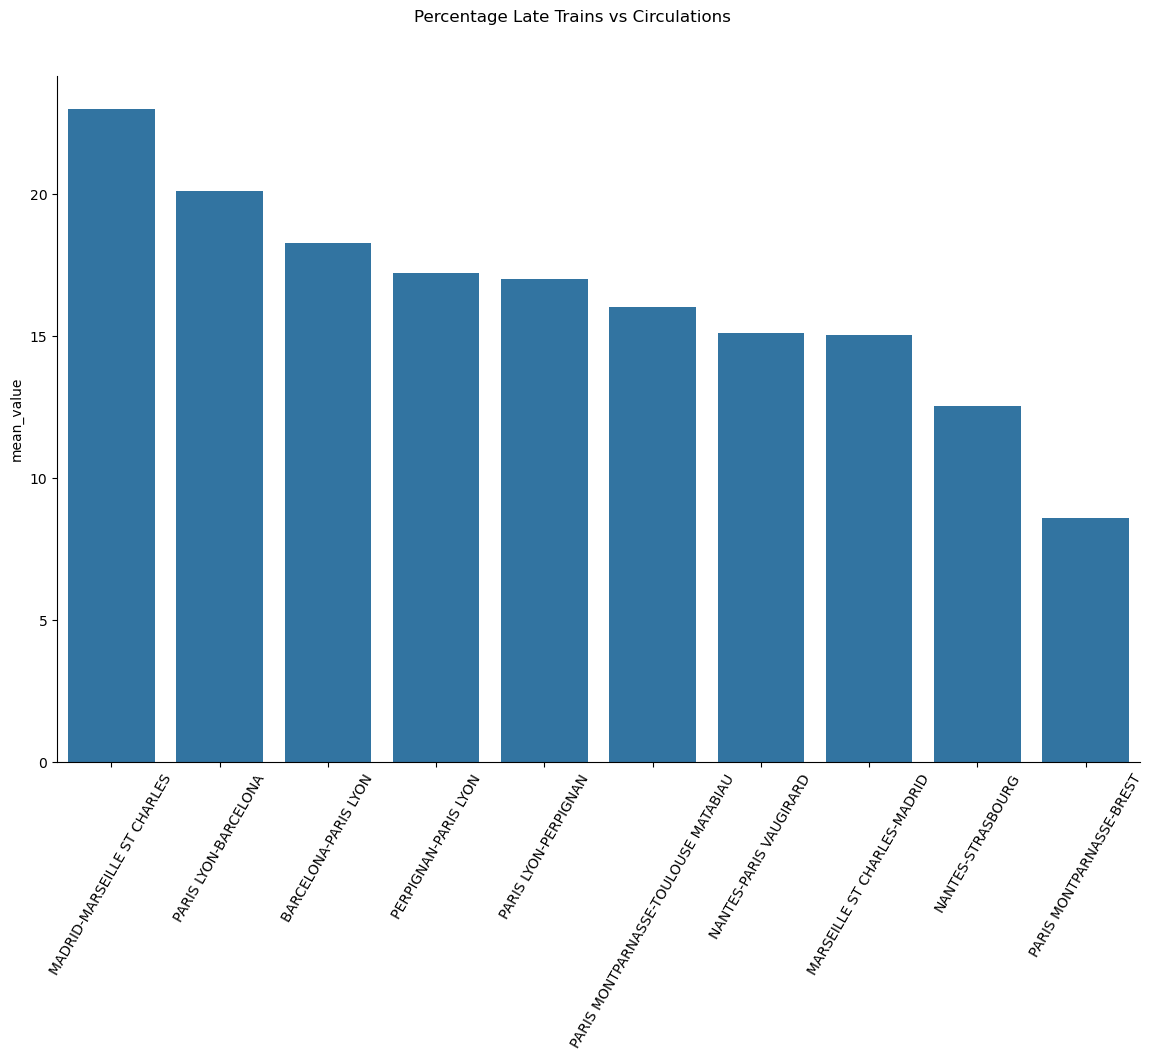

In [94]:
mdtr = sns.catplot(data= mean_circ_perc, x = 'Train Line', y = 'mean_value', kind = 'bar', height= 8.27, aspect= 11.7/8.27)
mdtr.figure.subplots_adjust(top= 0.9)
mdtr.figure.suptitle('Percentage Late Trains vs Circulations')
mdtr.set_xlabels('')
plt.xticks(rotation = 60)
pass

##### Average Travel Time Per Route

In [96]:
trav_time = df_late.groupby('Train Line').agg(mean_value =('Average travel time (min)','mean')).sort_values(by = 'mean_value', ascending= False).reset_index()

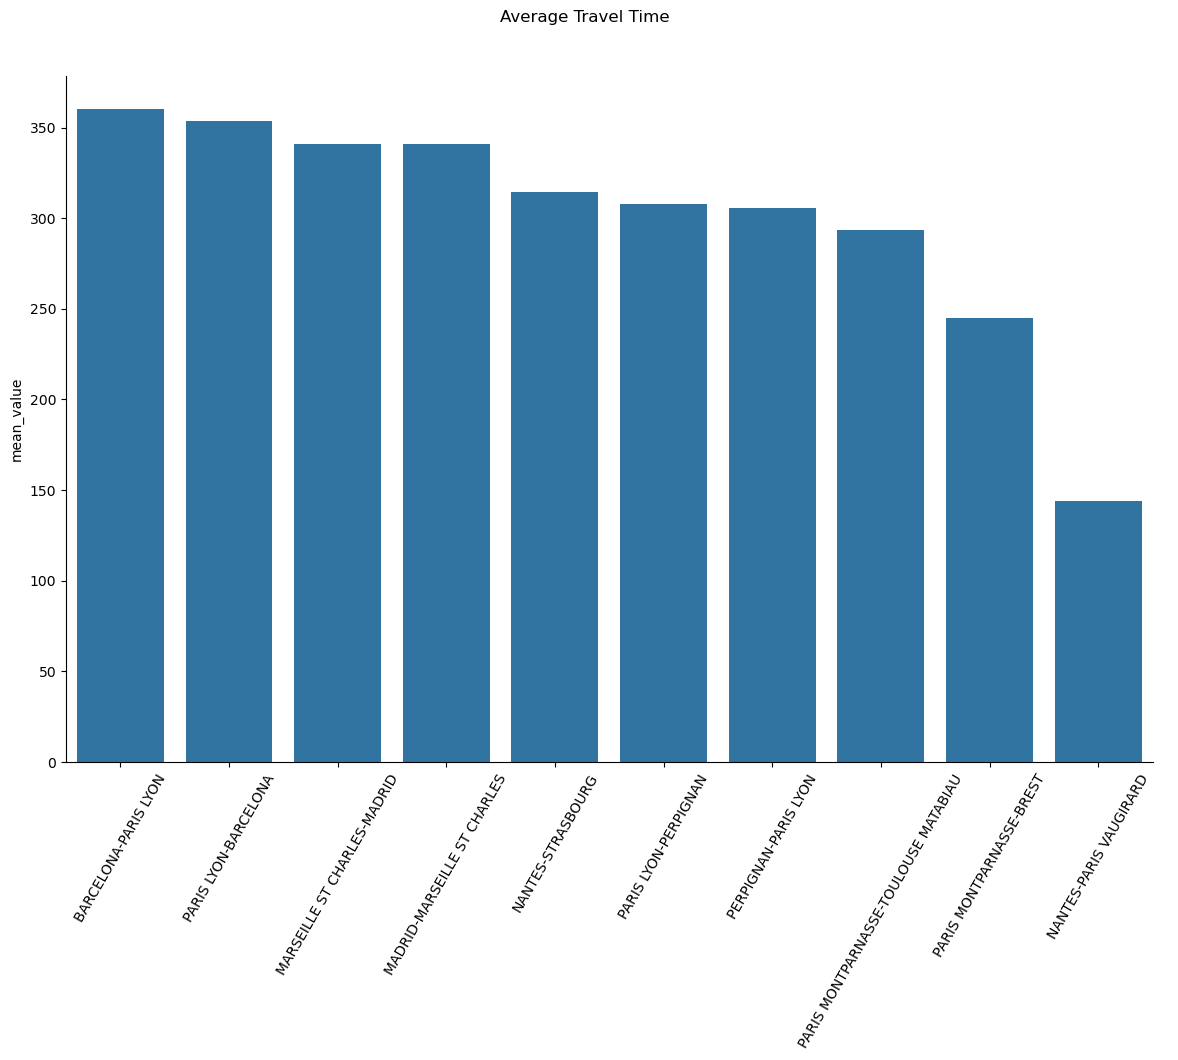

In [97]:
mdtr = sns.catplot(data= trav_time, x = 'Train Line', y = 'mean_value', kind = 'bar', height= 8.27, aspect= 11.7/8.27)
mdtr.figure.subplots_adjust(top= 0.9)
mdtr.figure.suptitle('Average Travel Time')
mdtr.set_xlabels('')
plt.xticks(rotation = 60)
pass